In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
    
df = pd.read_csv(url, sep = '\t')

In [3]:
df.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [4]:
#What is the number of observations in the dataset?
df.shape[0]

4622

In [5]:
#What is the number of columns in the dataset?
df.shape[1]

5

In [6]:
#Which was the most-ordered item and how many times it was ordered?
df = df.dropna(subset=['item_name'])
df['item_name'].value_counts().max()

726

In [7]:
df['item_name'].value_counts().idxmax()

'Chicken Bowl'

In [8]:
#How many different items are sold?
df['item_name'].unique().size

50

In [9]:
#How many items were orderd in total?
df['quantity'].sum()

4972

In [10]:
#Turn the item price into a float
df.item_price = df.item_price.apply(lambda x: float(x[1:-1]))

In [11]:
#What is the price of each item?
df.groupby(['item_name'])['item_price'].mean()

item_name
6 Pack Soft Drink                         6.610185
Barbacoa Bowl                            10.187273
Barbacoa Burrito                          9.832418
Barbacoa Crispy Tacos                    10.928182
Barbacoa Salad Bowl                      10.640000
Barbacoa Soft Tacos                      10.018400
Bottled Water                             1.867654
Bowl                                     14.800000
Burrito                                   7.400000
Canned Soda                               1.320577
Canned Soft Drink                         1.457641
Carnitas Bowl                            10.833971
Carnitas Burrito                         10.132712
Carnitas Crispy Tacos                    11.137143
Carnitas Salad                            8.990000
Carnitas Salad Bowl                      11.056667
Carnitas Soft Tacos                       9.398500
Chicken Bowl                             10.113953
Chicken Burrito                          10.082857
Chicken Crispy Tacos 

In [12]:
#How much was the revenue for the period in the dataset?
df['item_price'].sum()

34500.16

In [13]:
#How many orders were made in the period?
df['order_id'].unique().size

1834

In [14]:
#What is the average revenue amount per order?
df['item_price'].sum()/df['order_id'].unique().size

18.811428571428575

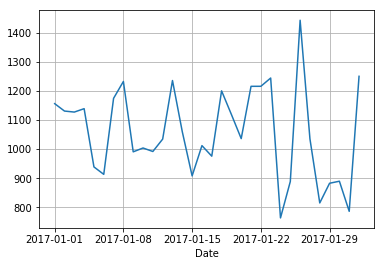

In [15]:
#Merge the table dfa that contains order date and order id with df and plot daily revenue
dfa = pd.DataFrame({"date": np.random.choice(pd.date_range(start="20170101", end="20170201"), size=1800),
                   "order_id": np.arange(1800)})
df1 = pd.merge(df, dfa).groupby('date').apply(lambda x: sum(x.item_price))
plt.grid()
plt.xlabel('Date')
plt.plot(df1)
plt.show()

In [16]:
#Create a histogram of the top 5 items bought
df2 = df.groupby('item_name').sum()

In [17]:
df2 = df2.sort_values(by='quantity', ascending=False)

In [18]:
df2.head(5)

,order_id,quantity,item_price
item_name,,,
Chicken Bowl,713926,761,7342.73
Chicken Burrito,497303,591,5575.82
Chips and Guacamole,449959,506,2201.04
Steak Burrito,328437,386,3851.43
Canned Soft Drink,304753,351,438.75


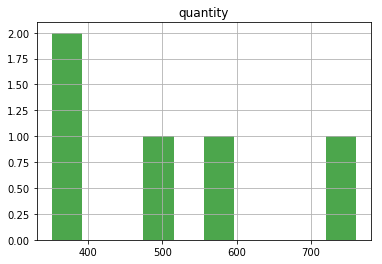

In [19]:
df2.head(5).hist(column = 'quantity', facecolor = 'g', alpha=0.7)
plt.show()

In [20]:
#Sort the dataset by the name of the item
df.sort_values(by=['item_name'], ascending = True)

,order_id,quantity,item_name,choice_description,item_price
3389,1360,2,6 Pack Soft Drink,[Diet Coke],12.98
341,148,1,6 Pack Soft Drink,[Diet Coke],6.49
1849,749,1,6 Pack Soft Drink,[Coke],6.49
1860,754,1,6 Pack Soft Drink,[Diet Coke],6.49
2713,1076,1,6 Pack Soft Drink,[Coke],6.49
3422,1373,1,6 Pack Soft Drink,[Coke],6.49
553,230,1,6 Pack Soft Drink,[Diet Coke],6.49
1916,774,1,6 Pack Soft Drink,[Diet Coke],6.49
1922,776,1,6 Pack Soft Drink,[Coke],6.49
1937,784,1,6 Pack Soft Drink,[Diet Coke],6.49


In [21]:
#How many times were a Veggie Salad Bowl ordered?
(df[df['item_name'] == 'Veggie Salad Bowl']).shape[0]

18

In [22]:
#How many times people orderd more than one Canned Soda?
(df[(df['item_name'] == 'Canned Soda') & (df['quantity'] > 1)]).shape[0]

20

In [23]:
#Create a scatterplot with the number of items orderered per order price
df3 = df.groupby('order_id').sum()

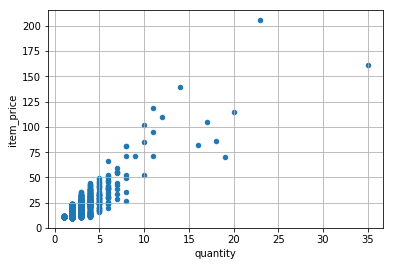

In [24]:
df3.plot.scatter(x = 'quantity', y = 'item_price')
plt.grid()
plt.xlabel('quantity')
plt.ylabel('item_price')
plt.show()